Random forest

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\LENOVO\Documents\GitHub\Data-mining-project\datasets_final\final_dataset.csv')
print(df.head())

   region  danceability  energy  key  loudness  mode  speechiness  \
0       3         0.685   0.644   10   -13.206     0       0.1550   
1       3         0.752   0.620    5    -5.536     1       0.0509   
2       1         0.748   0.627    7    -6.029     1       0.0639   
3       2         0.748   0.627    7    -6.029     1       0.0639   
4       3         0.748   0.627    7    -6.029     1       0.0639   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0         0.302          0.000055    0.1140    0.808  164.919       169379   
1         0.309          0.000000    0.0750    0.962  117.399       164459   
2         0.131          0.000000    0.0852    0.524  120.963       188491   
3         0.131          0.000000    0.0852    0.524  120.963       188491   
4         0.131          0.000000    0.0852    0.524  120.963       188491   

   time_signature  popular  
0               4        0  
1               4        0  
2               4        0  


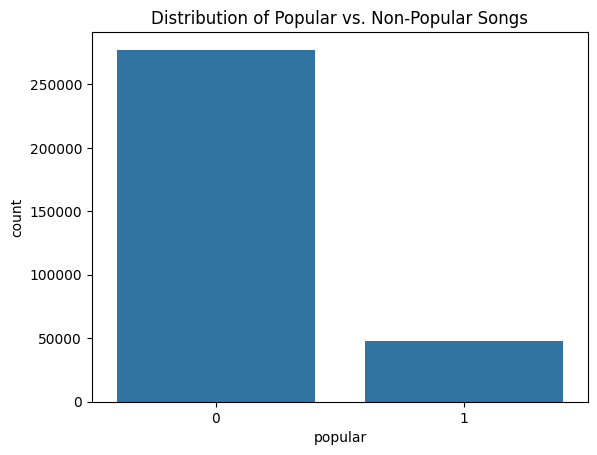

In [4]:
import seaborn as sns

sns.countplot(x='popular', data=df)
plt.title('Distribution of Popular vs. Non-Popular Songs')
plt.show()


In [2]:
df = pd.read_csv(r'C:\Users\noemi\Documents\GitHub\Data-mining-project\datasets_final\final_dataset.csv')

In [3]:
#Split the data into features and target variable
X = df.drop(columns=['popular'])  # Features
y = df['popular']  # Target variable

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.model_selection import cross_val_score

#Initialize the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)  # 5-fold cross-validation

#Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train and Test Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Training set performance
print("Training Set:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Test set performance
print("Test Set:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))


Training Set:
Accuracy: 0.992725509214355
Test Set:
Accuracy: 0.8523855711052607


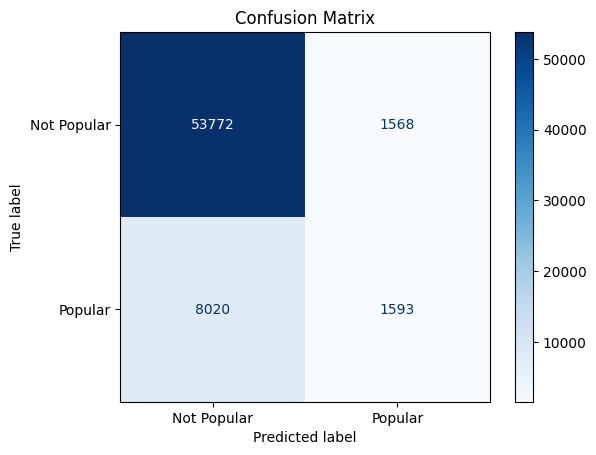

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Popular', 'Popular'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


Very high accuracy for the not popular songs, but very low for the popular songs. This is due to class imbalance.

In [13]:
# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8523855711052607
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     55340
           1       0.50      0.17      0.25      9613

    accuracy                           0.85     64953
   macro avg       0.69      0.57      0.58     64953
weighted avg       0.82      0.85      0.82     64953



Let's address class imbalance using oversampling with SMOTE.

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [8]:
# SMOTE
from imblearn.over_sampling import SMOTE


In [9]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


In [10]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


In [11]:
#Initialize the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
# Evaluate the model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8302994238727651
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     55470
           1       0.84      0.82      0.83     55443

    accuracy                           0.83    110913
   macro avg       0.83      0.83      0.83    110913
weighted avg       0.83      0.83      0.83    110913



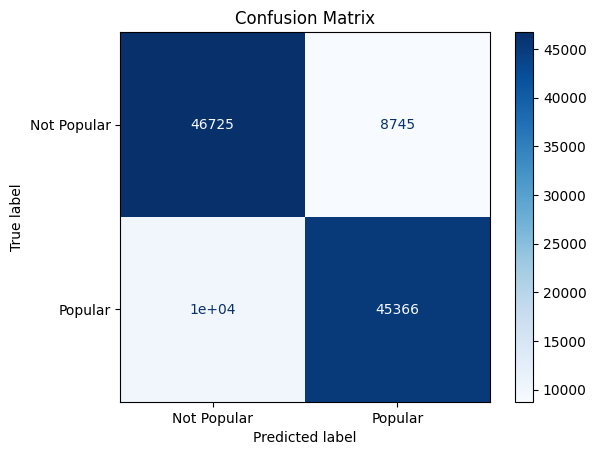

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Popular', 'Popular'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

The popular prediction is better and also the non popular prediction is accurate.

Let's try with undersampling

In [14]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler


In [15]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

In [16]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)

In [17]:
#Initialize the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Evaluate the model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6234600400126356
              precision    recall  f1-score   support

           0       0.62      0.65      0.64      9544
           1       0.63      0.59      0.61      9450

    accuracy                           0.62     18994
   macro avg       0.62      0.62      0.62     18994
weighted avg       0.62      0.62      0.62     18994



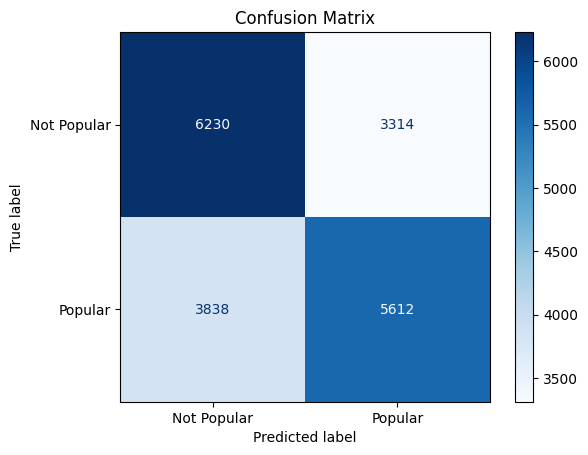

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Popular', 'Popular'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


This is also a good result.

In [39]:
region_analysis = df.groupby('region').mean()

print(region_analysis)


        danceability    energy       key  loudness      mode  speechiness  \
region                                                                      
0           0.686295  0.619734  5.206424 -7.608736  0.507380     0.137555   
1           0.603382  0.629306  5.294207 -6.861704  0.678162     0.079573   
2           0.661498  0.641239  5.287374 -7.342089  0.540551     0.129643   
3           0.663322  0.660444  5.356673 -6.707045  0.592774     0.105519   
4           0.642029  0.611241  5.288157 -7.634013  0.461966     0.104671   
5           0.657891  0.620176  5.185422 -6.990812  0.609833     0.131226   
6           0.642139  0.635878  5.316541 -7.348868  0.562723     0.108689   
7           0.647060  0.630660  5.223630 -7.050239  0.608444     0.115602   
8           0.622576  0.583866  5.239207 -7.393087  0.658991     0.081898   
9           0.649298  0.646239  5.306584 -7.021315  0.563503     0.119060   
10          0.669418  0.642748  5.338206 -7.263375  0.525084     0.145118   

For the feature importance it's better to use oversampling, to retain the full range of features associated with both classes

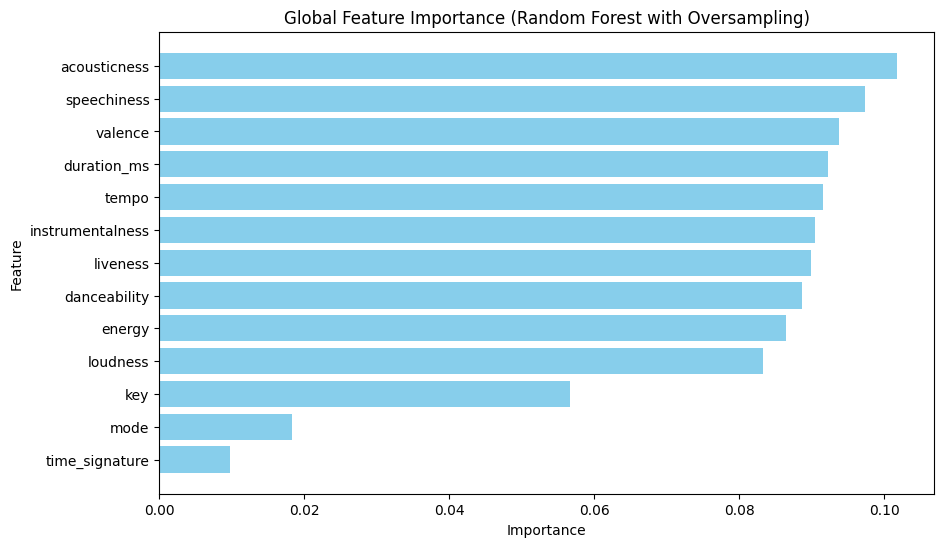

In [20]:
# Drop the 'region' column for global feature importance analysis
X = df.drop(columns=['region', 'popular'])  


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Plot feature importances
feature_names = X.columns  # Feature names excluding 'region' and 'popular'
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Global Feature Importance (Random Forest with Oversampling)')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()


In [5]:
df = pd.read_csv(r'C:\Users\noemi\Documents\GitHub\Data-mining-project\datasets_final\final_dataset.csv')

In [4]:
import pandas as pd

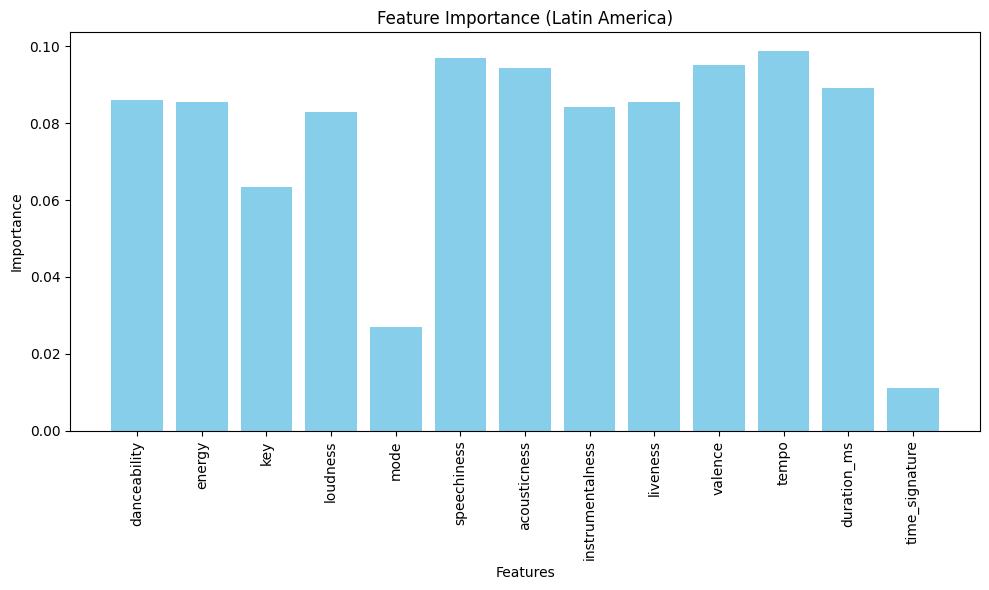

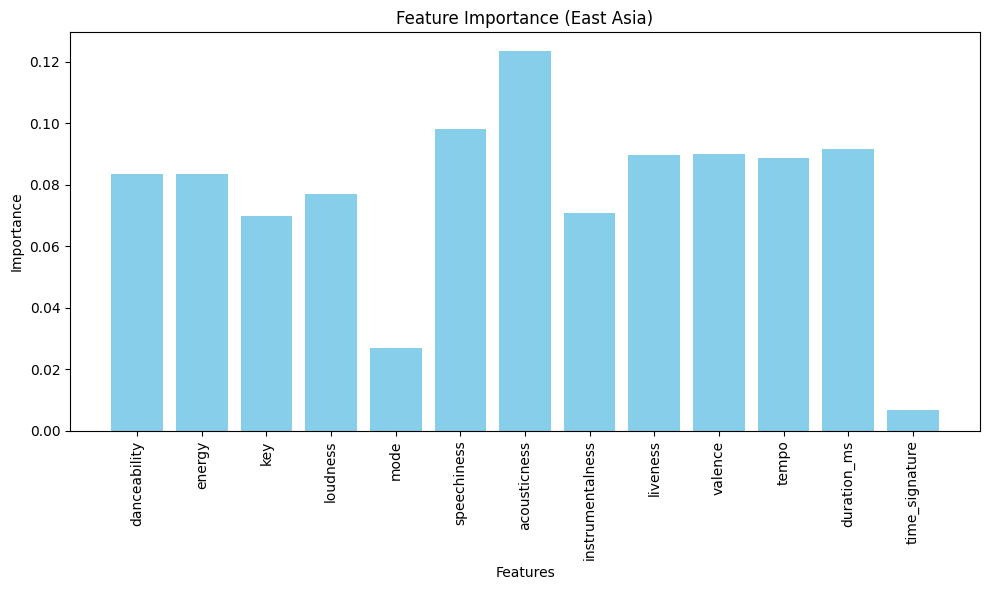

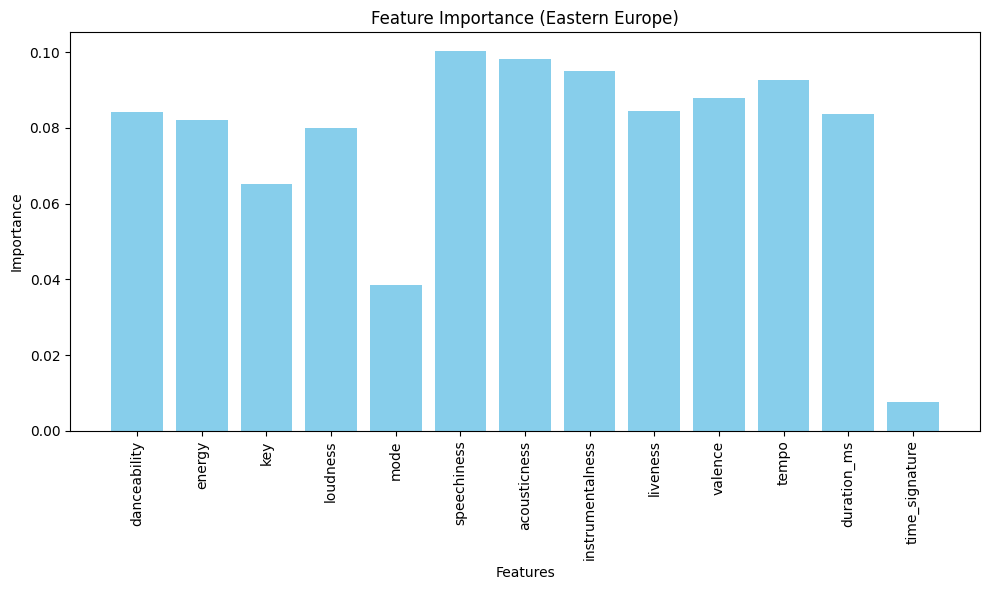

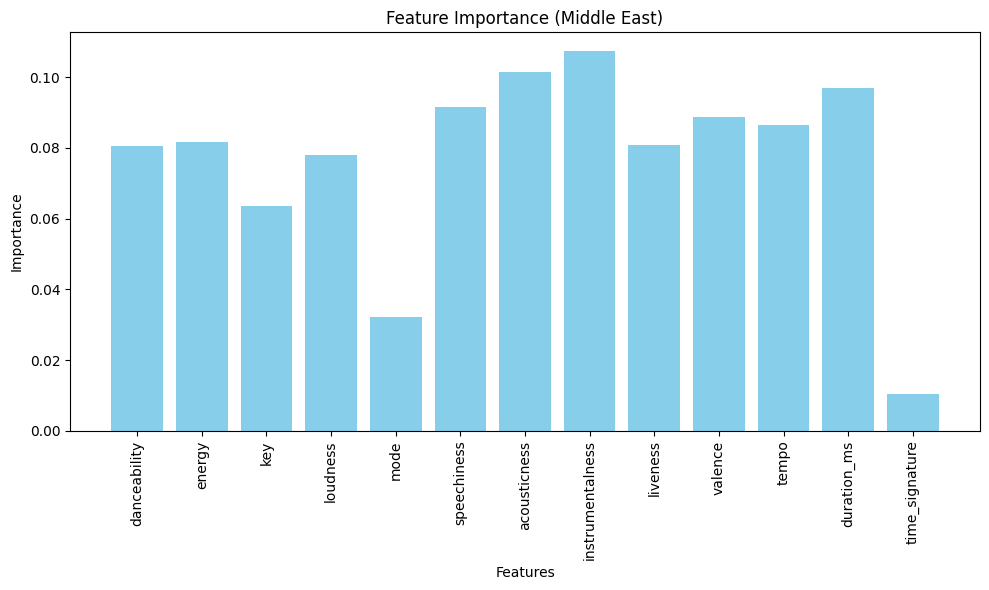

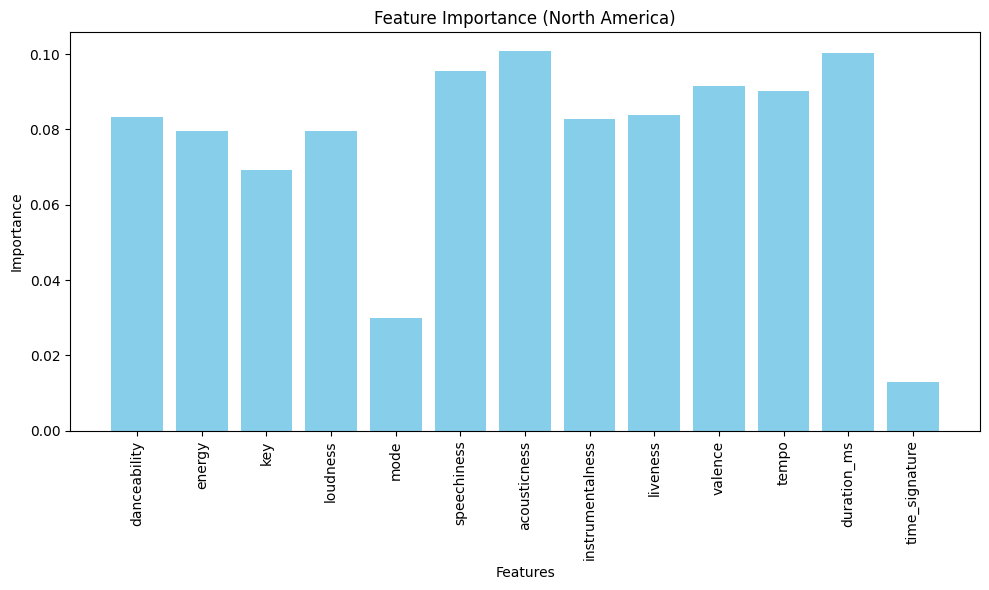

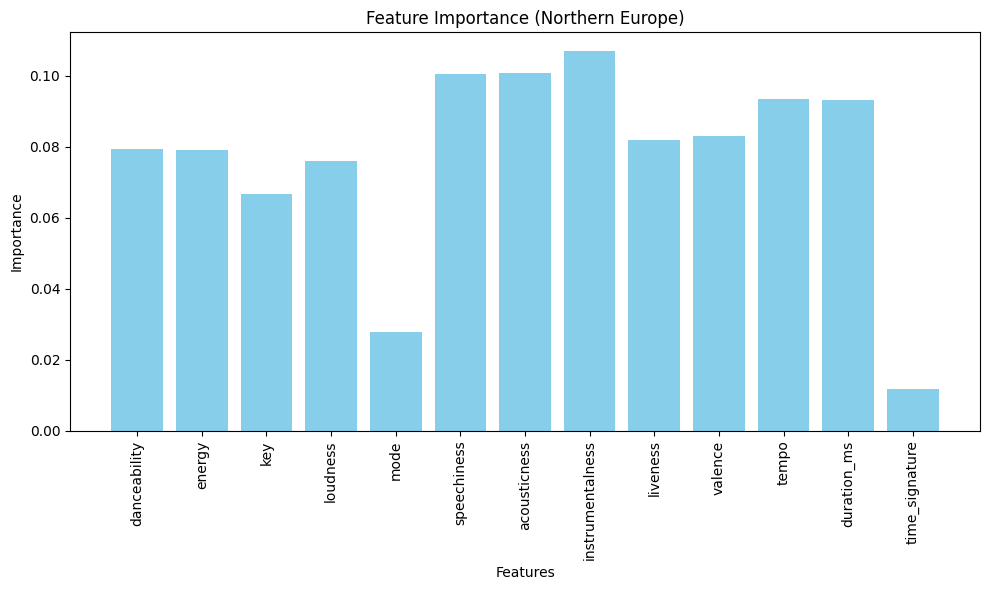

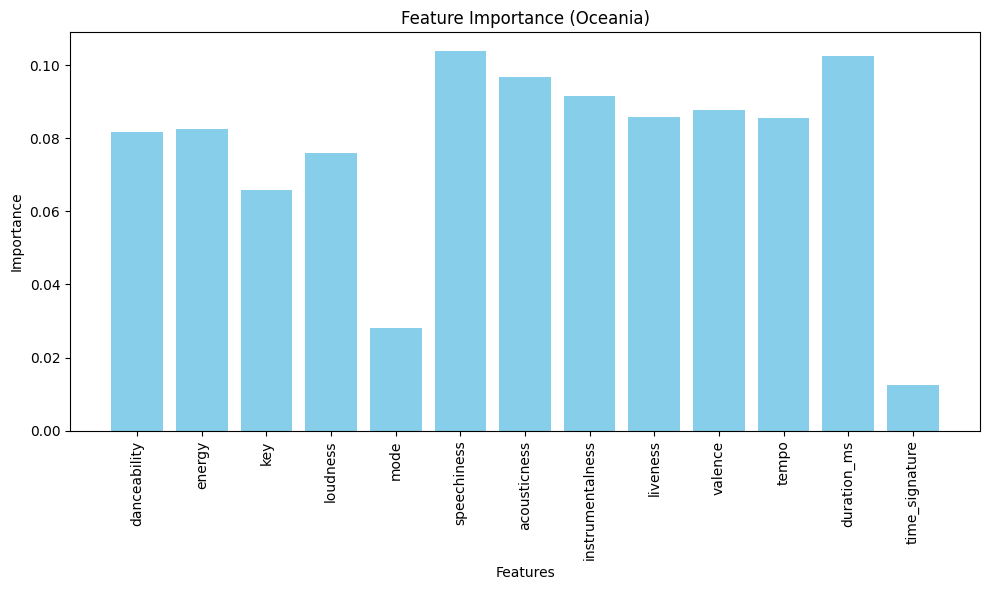

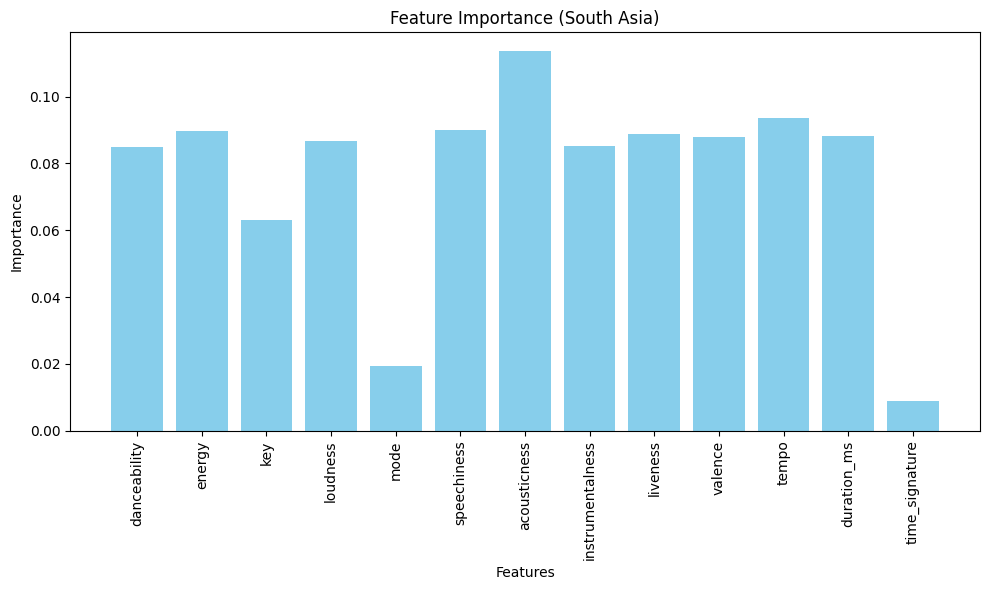

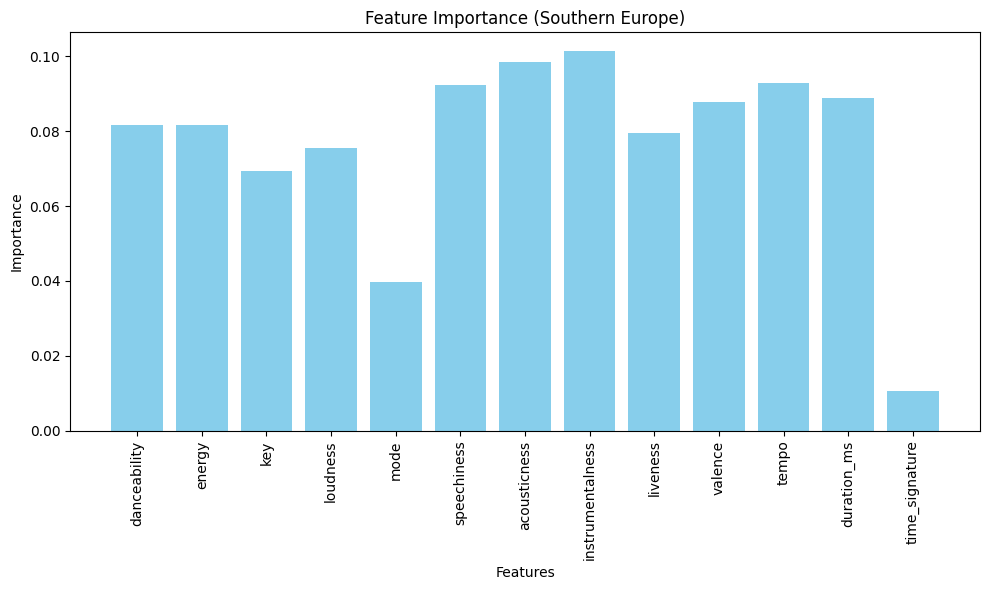

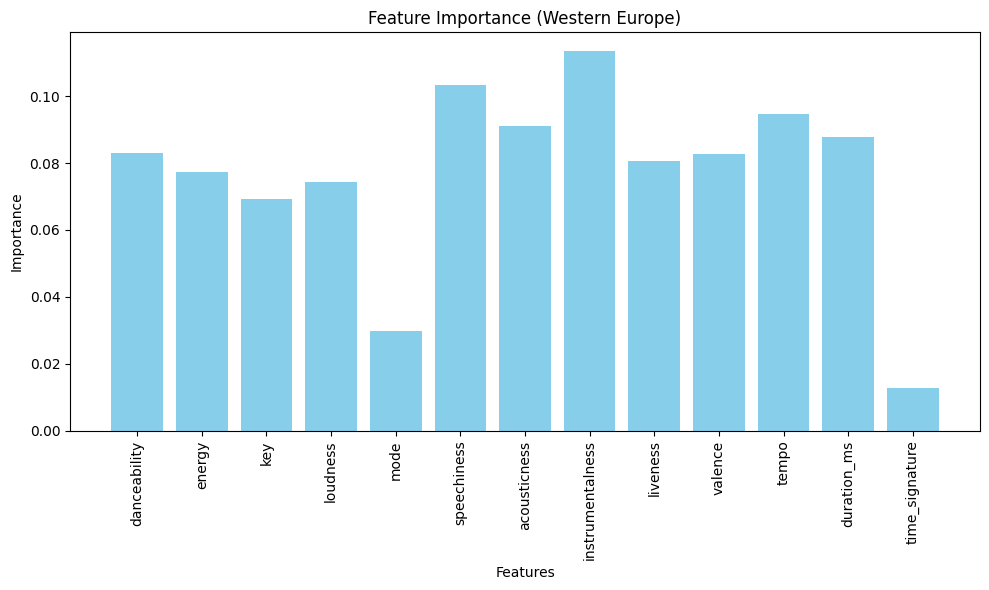

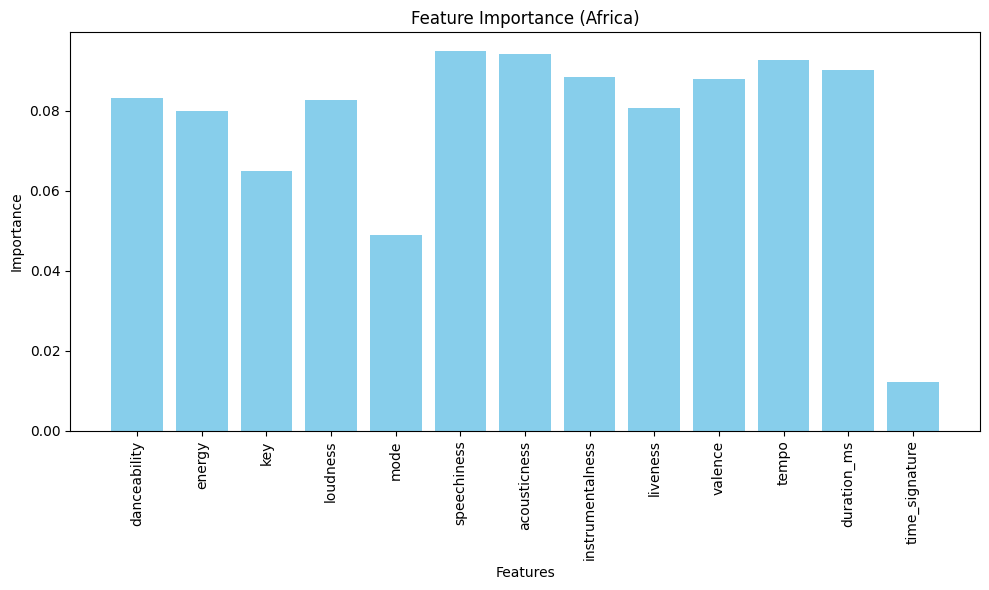

In [21]:
# Dictionary to map region codes to region names
region_names = {
    0: 'Africa',
    1: 'East Asia',
    2: 'Eastern Europe',
    3: 'Latin America',
    4: 'Middle East',
    5: 'North America',
    6: 'Northern Europe',
    7: 'Oceania',
    8: 'South Asia',
    9: 'Southern Europe',
    10: 'Western Europe'
}

# Get the unique regions from your dataset
regions = df['region'].unique()

for region in regions:
    # Filter data for the specific region
    region_data = df[df['region'] == region]
    
    # Prepare features and target
    X_region = region_data.drop(['region', 'popular'], axis=1)  # Features for this region
    y_region = region_data['popular']  # Target (popularity)
    
    # Apply SMOTE to balance classes in this region's data
    smote = SMOTE(random_state=42)
    X_region_resampled, y_region_resampled = smote.fit_resample(X_region, y_region)
    
    # Train a Random Forest model for this region
    rf_model_region = RandomForestClassifier(random_state=42)
    rf_model_region.fit(X_region_resampled, y_region_resampled)

    # Get feature importances
    feature_importances_region = rf_model_region.feature_importances_
    
    # Get the name of the region from the dictionary
    region_name = region_names.get(region, f"Region {region}")

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importance ({region_name})")
    plt.bar(range(X_region.shape[1]), feature_importances_region, align='center', color='skyblue')
    plt.xticks(range(X_region.shape[1]), X_region.columns, rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()


In [23]:
import numpy as np

In [31]:
for region in regions:
    # Filter data for the specific region
    region_data = df[df['region'] == region]
    
    # Prepare features and target
    X_region = region_data.drop('popular', axis=1)  # Features for this region
    y_region = region_data['popular']  # Target (popularity)

    # Apply SMOTE to balance the classes within each region
    smote = SMOTE(random_state=42)
    X_region_resampled, y_region_resampled = smote.fit_resample(X_region, y_region)

    # Train a Random Forest model on the resampled data for this region
    rf_model_region = RandomForestClassifier(random_state=42)
    rf_model_region.fit(X_region_resampled, y_region_resampled)

    # Get feature importances
    feature_importances_region = rf_model_region.feature_importances_

    # Pair features with their importance
    features_with_importance = list(zip(X_region.columns, feature_importances_region))

    # Sort features by importance and get the top 5
    top_5_features = sorted(features_with_importance, key=lambda x: x[1], reverse=True)[:5]

    # Get the name of the region from the dictionary
    region_name = region_names[region]
    print(f"\nRegion: {region_name} (Code {region}) - Top 5 Important Features:")

    # Display feature name, importance, and mean value
    for feature, importance in top_5_features:
        mean_value = region_data[feature].mean()  # Calculate mean value for this feature in the region
        print(f"Feature: {feature}, Importance: {importance:.4f}, Mean Value: {mean_value:.2f}")



Region: Latin America (Code 3) - Top 5 Important Features:
Feature: tempo, Importance: 0.0980, Mean Value: 122.61
Feature: speechiness, Importance: 0.0971, Mean Value: 0.11
Feature: valence, Importance: 0.0956, Mean Value: 0.58
Feature: acousticness, Importance: 0.0953, Mean Value: 0.29
Feature: duration_ms, Importance: 0.0886, Mean Value: 217127.50

Region: East Asia (Code 1) - Top 5 Important Features:
Feature: acousticness, Importance: 0.1223, Mean Value: 0.30
Feature: speechiness, Importance: 0.0982, Mean Value: 0.08
Feature: liveness, Importance: 0.0910, Mean Value: 0.18
Feature: duration_ms, Importance: 0.0902, Mean Value: 229571.73
Feature: valence, Importance: 0.0896, Mean Value: 0.47

Region: Eastern Europe (Code 2) - Top 5 Important Features:
Feature: speechiness, Importance: 0.1009, Mean Value: 0.13
Feature: acousticness, Importance: 0.0973, Mean Value: 0.24
Feature: instrumentalness, Importance: 0.0967, Mean Value: 0.06
Feature: tempo, Importance: 0.0928, Mean Value: 122.3

In [27]:
# Loop through each region and check the importance of danceability
for region in regions:
    # Filter data for the specific region
    region_data = df[df['region'] == region]
    
    # Prepare features and target
    X_region = region_data.drop('popular', axis=1)  # Features for this region
    y_region = region_data['popular']  # Target (popularity)

    # train a model for this region
    rf_model_region = RandomForestClassifier(random_state=42)
    rf_model_region.fit(X_region, y_region)

    # Get feature importances
    feature_importances_region = rf_model_region.feature_importances_

    # Get the index of the 'danceability' feature
    feature_names = X_region.columns
    danceability_index = list(feature_names).index('danceability')
    
    # Check if danceability is an important feature
    if feature_importances_region[danceability_index] > importance_threshold:
        region_name = region_names.get(region, f"Region {region}")
        print(f"Danceability is an important feature in {region_name}.")

Danceability is an important feature in Latin America.
Danceability is an important feature in East Asia.
Danceability is an important feature in Eastern Europe.
Danceability is an important feature in Middle East.
Danceability is an important feature in North America.
Danceability is an important feature in Northern Europe.
Danceability is an important feature in Oceania.
Danceability is an important feature in South Asia.
Danceability is an important feature in Southern Europe.
Danceability is an important feature in Western Europe.
Danceability is an important feature in Africa.


In [28]:
# Example new song features
new_song_data = {
    'region': 1,  
    'danceability': 0.591,
    'energy': 0.903,
    'key': 2,               
    'loudness': -4.102,
    'mode': 1,
    'speechiness': 0.0312,
    'acousticness': 0.000607,
    'instrumentalness': 0.0,
    'liveness': 0.183,
    'valence': 0.512,
    'tempo': 103.992,
    'duration_ms': 273307,
    'time_signature': 4
}

#Create a DataFrame
new_song_df = pd.DataFrame([new_song_data], columns=X.columns)

# Scale the new song data using the fitted scaler
new_song_scaled = scaler.transform(new_song_df)

# Make prediction
predicted_popularity = rf_model.predict(new_song_scaled)

# Output the prediction
if predicted_popularity[0] == 1:
    print("The new song is predicted to be popular.")
else:
    print("The new song is predicted to be not popular.")


The new song is predicted to be popular.


In [10]:
import joblib

# Assuming 'rf' is your trained model
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']